In [1]:
# import the essential libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('HateSpeechDatasetBalanced.csv')

# check the dimension of dataset
num_rows, num_cols = data.shape
print('The dataset contains {} rows and {} columns.'.format(num_rows, num_cols))

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view the first 5 rows of the dataset
data.head()

The dataset contains 726119 rows and 2 columns.
Attributes in the dataset:  ['Content' 'Label']


,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [3]:
!pip install pywaffle


  Obtaining dependency information for fontawesomefree from https://files.pythonhosted.org/packages/8f/fc/295f4f71fc157de68dcf25a4850953e61f6eca644e7416f10a281ed42441/fontawesomefree-6.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.6 MB 9.6 MB/s eta 0:00:03
   - -------------------------------------- 0.8/25.6 MB 10.8 MB/s eta 0:00:03
   - -------------------------------------- 1.3/25.6 MB 11.5 MB/s eta 0:00:03
   -- ------------------------------------- 1.8/25.6 MB 11.3 MB/s eta 0:00:03
   --- ------------------------------------ 2.2/25.6 MB 10.6 MB/s eta 0:00:03
   ---- ----------------------------------- 2.6/25.6 MB 11.0 MB/s eta 0:00:03
   ---- ----------------------------------- 3.1/25.6 MB 11.0 MB/s eta 0:00:03
   ----- ---------------------------------- 3.6/25.6 MB 11.0 MB/s eta 0:00:03
   ------ --------------------------------- 4.2/25.6 MB 11.1 MB/s eta 0:00:02
   ------- ---

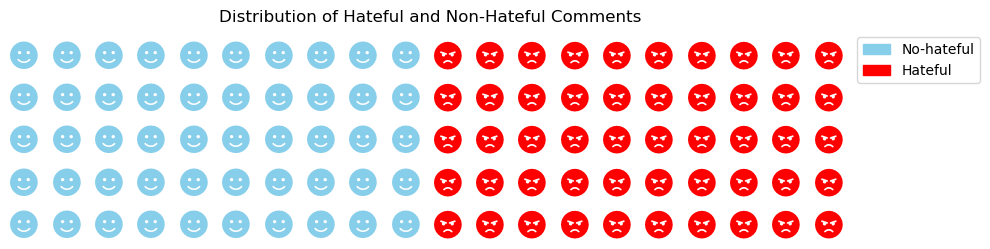

In [4]:
from pywaffle import Waffle

# check the distribution of the non-hateful and hateful comments in the dataset
comments = data.Label.value_counts()
percentage = (comments.values / data.shape[0]) * 100

figure = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=percentage,
    colors=['skyblue', 'red'],
    icons=['face-smile','face-angry'],
    icon_legend=False,
    legend={
        'labels': ['No-hateful', 'Hateful'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    font_size=20,
    figsize=(10,6)
)

# add a title to the figure
plt.title('Distribution of Hateful and Non-Hateful Comments')
plt.show()

In [5]:
data = data.sample(n=5000)


In [6]:
# group the training dataset into non-hateful and hateful
groups = data.groupby('Label')
non_hateful = groups.get_group(0)
hateful = groups.get_group(1)

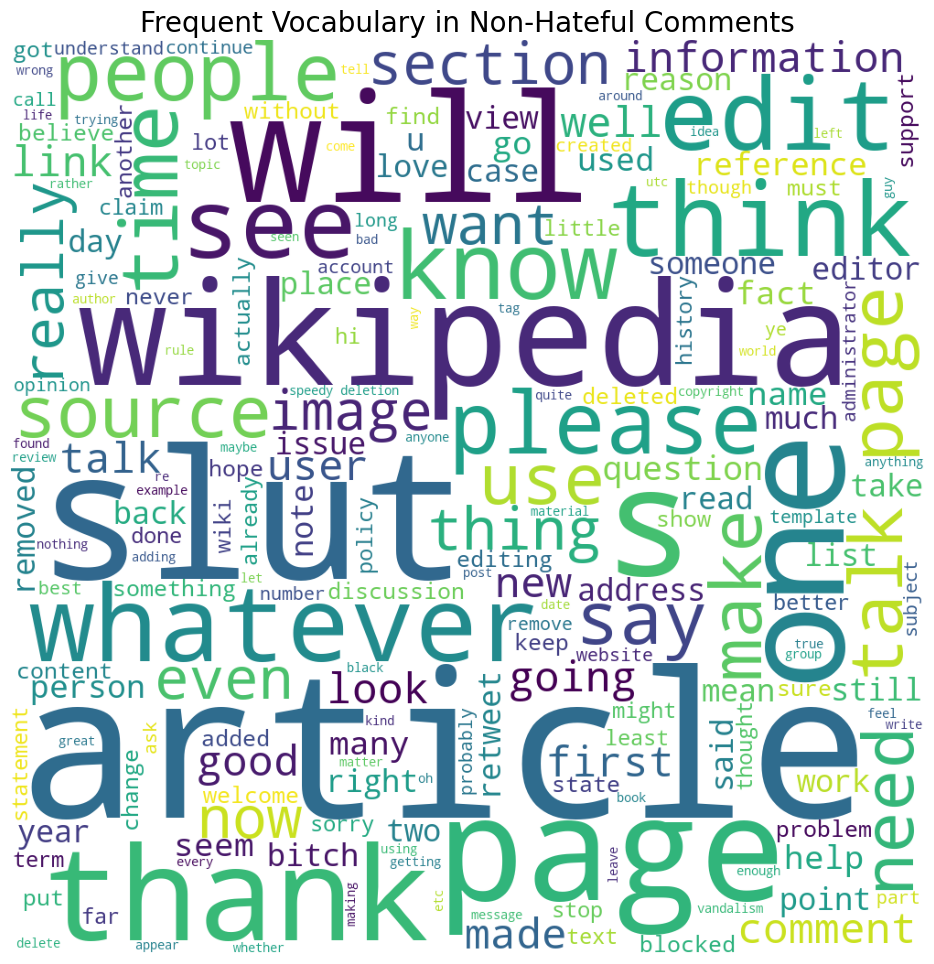

In [7]:
from wordcloud import WordCloud

combined_title = ' '.join(non_hateful['Content'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in Non-Hateful Comments', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

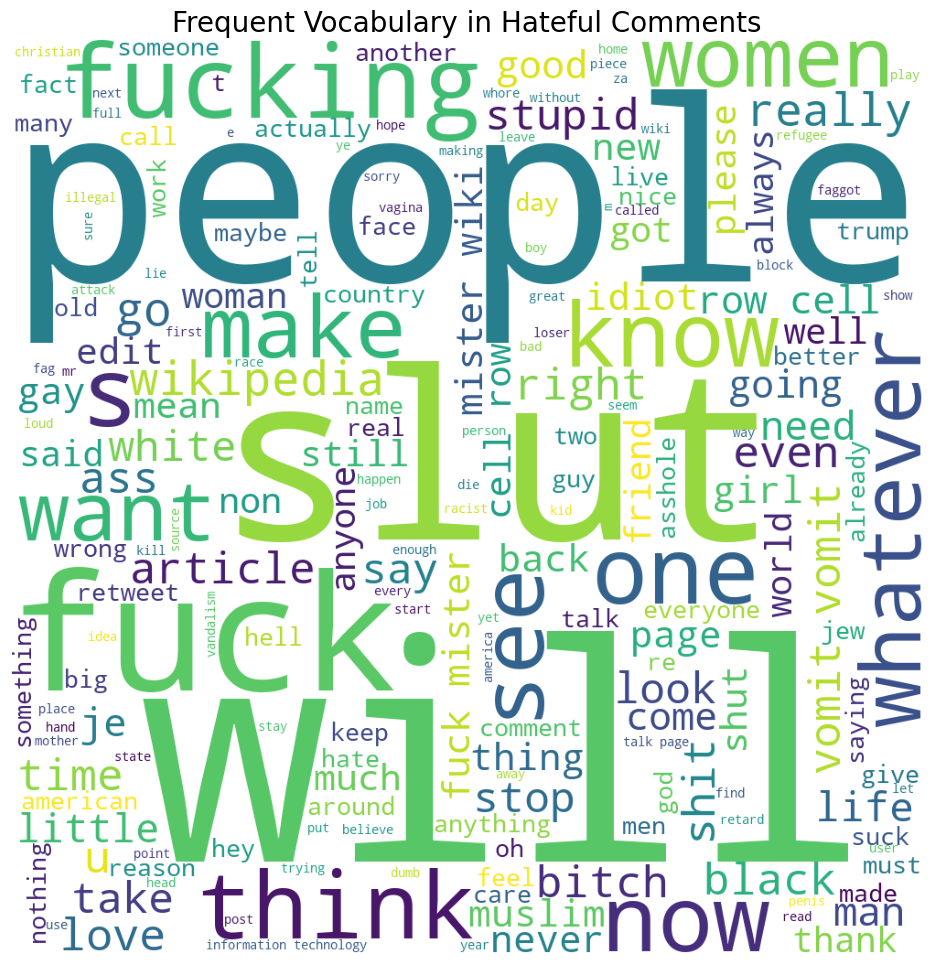

In [8]:
from wordcloud import WordCloud

combined_title = ' '.join(hateful['Content'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in Hateful Comments', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

In [9]:
!pip install spacy


  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [10]:
!python -m spacy download en_core_web_lg


     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 660.6 kB/s eta 0:14:50
     -------------------------------------- 0.0/587.7 MB 393.8 kB/s eta 0:24:53
     ---------------------------------------- 0.3/587.7 MB 2.2 MB/s eta 0:04:26
     ---------------------------------------- 0.8/587.7 MB 5.2 MB/s eta 0:01:54
     ---------------------------------------- 1.4/587.7 MB 6.3 MB/s eta 0:01:33
     ---------------------------------------- 1.7/587.7 MB 6.8 MB/s eta 0:01:26
     ---------------------------------------- 2.2/587.7 MB 7.4 MB/s eta 0:01:19
     ---------------------------------------- 2.8/587.7 MB 7.8 MB/s eta 0:01:16
     ---------------------------------------- 3.4/587.7 MB 8.2 MB/s eta 0:01:11
     ---------------------------------------- 3.9/587.7 MB 8.6 MB/s eta 0:01:09
     ---------------------------------------- 4.3/587.7 MB 8.8 MB/s eta 0:01:06
     ---------------------------------------- 4

In [11]:
# load SpaCy libraries and the language model (large model)
import spacy
nlp = spacy.load('en_core_web_lg')

In [14]:
data_spacy = data.copy()


In [15]:
data_spacy['textVector'] = data_spacy['Content'].apply(lambda x: nlp(x).vector)


In [38]:
data_spacy

,Content,Label,textVector
19887,trans people are people no matter how gross th...,1,"[-1.5815201, 2.204443, -3.9364865, 0.5006649, ..."
448224,come 2 cnn alexander literally introduced hims...,1,"[-1.3988085, 0.078282766, -0.79570466, 1.03871..."
446329,well i am in agreeable with you thinking about...,1,"[-0.61540943, 1.4640938, -3.7458987, -0.779273..."
722655,david duke why have you remove truth from your...,1,"[-0.24164686, 1.4159362, -3.4339206, -0.442924..."
239667,midgley aside i do not accept,0,"[-0.49611664, 3.2103598, -1.9107413, -2.841641..."
...,...,...,...
186907,governors of tamil nadu nicholas i have been u...,0,"[-0.39408475, 0.36518437, -1.8868631, -0.41493..."
419550,mbc episodes hello i am very like buster and w...,0,"[-0.476795, 1.3903157, -2.5623848, -0.76332474..."
474290,some black women be actually non that bawdry,1,"[-3.8916965, 0.89874375, -1.6495874, 2.209049,..."
548530,alphabet are lazy,1,"[-3.9731, -0.19771338, 1.4038, 0.4110999, 0.90..."


In [16]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test datasets
train, test = train_test_split(data_spacy, test_size=0.2, random_state=122)

# check the dimension of the training and test datasets
print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

Dimension of training dataset:  (4000, 3)
Dimension of test dataset:  (1000, 3)


In [17]:
# segregate the feature and label of the train and test data
Xtrain = train['textVector']
ytrain = train['Label']

Xtest = test['textVector']
ytest = test['Label']

In [18]:
# convert the Xtrain and Xtest data into 2D numpy array
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

Xtrain_2d = np.stack(Xtrain)
Xtest_2d = np.stack(Xtest)


In [19]:
# scale the feature vector 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_2d)
Xtest_scaled = scaler.transform(Xtest_2d)


In [20]:
from sklearn.naive_bayes import MultinomialNB

# instantiate a MultinomialNB() class
clf = MultinomialNB()

# train a model using data processed using word embeddings approach
mNB = clf.fit(Xtrain_scaled, ytrain)


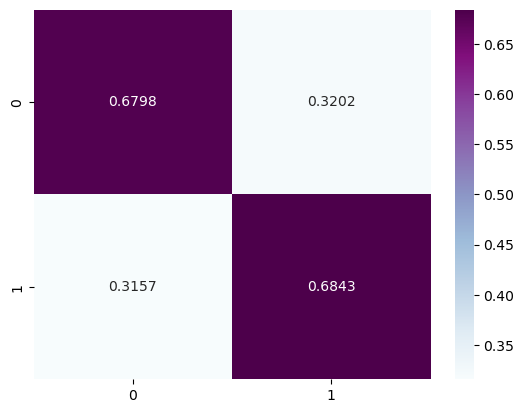

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       509
           1       0.67      0.68      0.68       491

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.68      0.68      1000



In [21]:
from sklearn.metrics import confusion_matrix, classification_report

ypred = mNB.predict(Xtest_scaled)

# confusion matrix
confusionMatrix = confusion_matrix(ytest,ypred, normalize='true')

# visualize the confusion matrix in heatmap
plt.figure()
sns.heatmap(confusionMatrix, annot=True, cmap='BuPu', fmt='.4g')
plt.show()

# classification report
report = classification_report(ytest, ypred)
print(report)


# Text Processing Approach 2 | TF-IDF from Scikit-Learn

In [22]:
data_tfidf = data.copy()


In [25]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import string

punctuation = re.compile("[" + re.escape(string.punctuation) + "]")

# define the list of stopwords
stopwords = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

def textProcess(text):
    res = []
    text_punc_remove = re.sub(punctuation,'',text)
    tokens = word_tokenize(text_punc_remove)
    for token in tokens:
        if token.lower() not in stopwords:
            lemmatized_word = lemmatizer.lemmatize(token)
            res.append(lemmatized_word)
    return ' '.join(res)

In [32]:
data_tfidf['processed_text'] = data_tfidf['Content'].apply(textProcess)


In [33]:
# split the dataset into training and test datasets
train, test = train_test_split(data_tfidf, test_size=0.2, random_state=122)

# check the dimension of the training and test datasets
print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

Dimension of training dataset:  (4000, 3)
Dimension of test dataset:  (1000, 3)


In [34]:
# segregate the feature and label of the train and test data
Xtrain = train['processed_text']
ytrain = train['Label']

Xtest = test['processed_text']
ytest = test['Label']


In [35]:
# feature transformation - TF-IDF to the processed text feature
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer  object
vectorizer = TfidfVectorizer()

# vectorize and perform TF-IDF to the training data
Xtrain_vectorized = vectorizer.fit_transform(Xtrain)

# vectorize and perform TF*IDF to the test data
Xtest_vectorized = vectorizer.transform(Xtest)


In [36]:
# instantiate a MultinomialNB() class
clf = MultinomialNB()

# train the model with training data processed using TF-IDF
mNB = clf.fit(Xtrain_vectorized, ytrain)

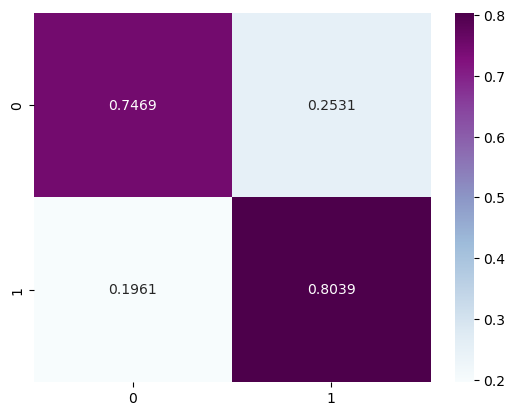

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       490
           1       0.77      0.80      0.79       510

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



In [37]:
ypred = mNB.predict(Xtest_vectorized)

# confusion matrix
confusionMatrix = confusion_matrix(ytest,ypred, normalize='true')

# visualize the confusion matrix in heatmap
plt.figure()
sns.heatmap(confusionMatrix, annot=True, cmap='BuPu', fmt='.4g')
plt.show()

# classification report
report = classification_report(ytest, ypred)
print(report)